# New Section

# Install Dependencies

In [32]:
# !pip install keras

In [33]:
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python import keras
# import tensorflow as tf

In [34]:
# from tensorflow.python.keras import layers

In [35]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import PIL


# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# import pathlib
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense

Install tensorflow gpu (select the suitable version)


In [36]:
# Code to use specific version of tensorflow
!pip install -U --pre tensorflow_gpu=="2.2.0"
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# Matplotlib library is generally used to visualize the data using 2D and 3D plotting graphs.
import matplotlib.pyplot as plt
# Numpy is a library use to perform mathematical operations on arrays
import numpy as np
# OS(Operating System) depends module used to access files from the computer
import os
# PIL (Python Image Processing) Library is used to visualize and to modify the images
import PIL
# TensorFlow is a free and open-source software library for machine learning and artificial intelligence. 
# It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.
import tensorflow as tf
# Keras is an open-source software library that provides a Python interface for artificial neural networks.
# Keras acts as an interface for the TensorFlow library.
from tensorflow import keras
# Importing neural network layers 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# This module offers classes representing filesystem paths with semantics appropriate for different operating systems
import pathlib
# The datetime module supplies classes for manipulating dates and times
import datetime
# from tensorflow.keras.layers import Dense

### Connect to the drive

In [38]:
# Connecting drive to the notebook to access the stored data from the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Below line of code unzipping the zipped image dataset
!unzip /content/drive/MyDrive/SolarPanelSoilingImageDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5499.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_55.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_550.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5500.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5501.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5502.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5503.jpg  
  inflating: SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/White_Powder/White_Powder_5504.jpg  
  inflating: SolarPanelSoilingImageDatas

In [40]:
# Specifying the path of the dataset
data_dir = pathlib.Path('/content/SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset')

In [41]:
# Visualizing the images in unzipped dataset
Brown_Dust = len(list(data_dir.glob('./Brown_Dust/*.jpg')))
print(Brown_Dust)

1458


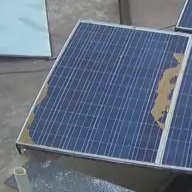

In [42]:
Brown_Dust = list(data_dir.glob('./Brown_Dust/*.jpg'))
PIL.Image.open(str(Brown_Dust[0]))

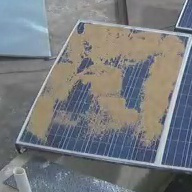

In [43]:
PIL.Image.open(str(Brown_Dust[900]))

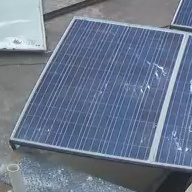

In [44]:
White_Powder = list(data_dir.glob('./White_Powder/*.jpg'))
PIL.Image.open(str(White_Powder[0]))

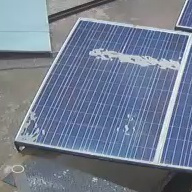

In [45]:

PIL.Image.open(str(White_Powder[900]))

In [46]:
# The batch size defines the number of samples that will be propagated through the network.
# The algorithm takes 32 samples batch size for training dataset and trains the network.
batch_size = 32
# Actual height and width of image in Pixel
img_height = 192
img_width = 192

In [47]:
# Data Splitting into train and validation sets
# It's good practice to use a validation split when developing your model. 
# Here 80% of the images for training, and 20% for validation.
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45126 files belonging to 5 classes.
Using 36101 files for training.


In [48]:
# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45126 files belonging to 5 classes.
Using 9025 files for validation.


In [49]:
# test_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [50]:
# Printing class names preset in the dataset
class_names = train_ds.class_names
print(class_names)

['Brown_Dust', 'Cleaned', 'Red_Sand', 'Red_Sand_With_White_Powder', 'White_Powder']


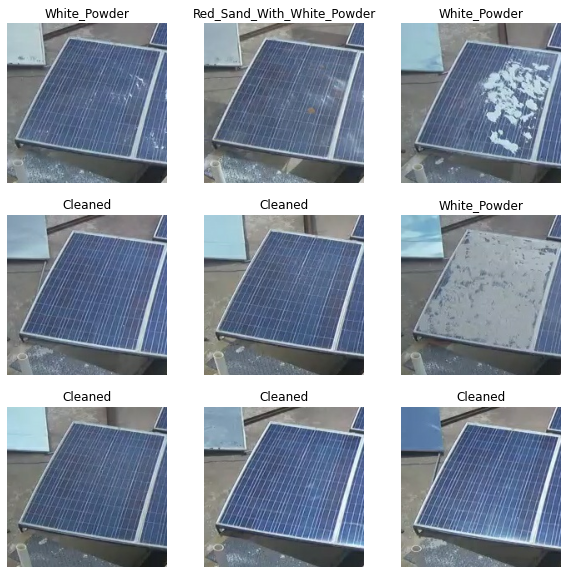

In [51]:
# Visualizing random images from dataset using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [52]:
# The image_batch is a tensor of the shape (32, 192, 192, 3).
# This is a batch of 32 images of shape 192x192x3 (the last dimension refers to color channels RGB). 
# The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 192, 192, 3)
(32,)


In [53]:
# Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking.
# These are two important methods you should use when loading data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
# normalization_layer = layers.Rescaling(1./255)

In [55]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [56]:
num_classes = len(class_names)
# The Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them.
# There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').
# This model has not been tuned for high accuracy—the goal of this tutorial is to show a standard approach.
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  # layers.Dense(num_classes)
  layers.Dense(num_classes,activation='softmax')
])

In [57]:
# While training the deep learning model, we need to modify each epoch's weights and minimize the loss function. 
# An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate.
# Thus, it helps in reducing the overall loss and improve the accuracy.
# Choosing Adam optimizer to adjust the weights and biases.
# Choosing sparse categorical crossentropy as a loss funtion because in solar panel dataset images are divided on the basis of category
# To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
# from_logits=True


In [59]:
# Epochs are the number of times we are feeding data in neural network for training
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1129/1129 [==============================] - 145s 128ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0040 - val_accuracy: 0.9988
Epoch 2/10
1129/1129 [==============================] - 145s 129ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0040 - val_accuracy: 0.9989
Epoch 3/10
1129/1129 [==============================] - 145s 129ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9989
Epoch 4/10
1129/1129 [==============================] - 142s 126ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9989
Epoch 5/10
1129/1129 [==============================] - 139s 123ms/step - loss: 6.5393e-05 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9990
Epoch 6/10
1129/1129 [==============================] - 138s 122ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0016 - val_accuracy: 0.9992
Epoch 7/10
1129/1129 [==============================] - 141s 125ms/step - loss: 8.0884e-04 - accuracy: 0.999

In [75]:
# summery function in keras used to visualize the layers in the neural network
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 192, 192, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 192, 192, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 96, 96, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73728)            

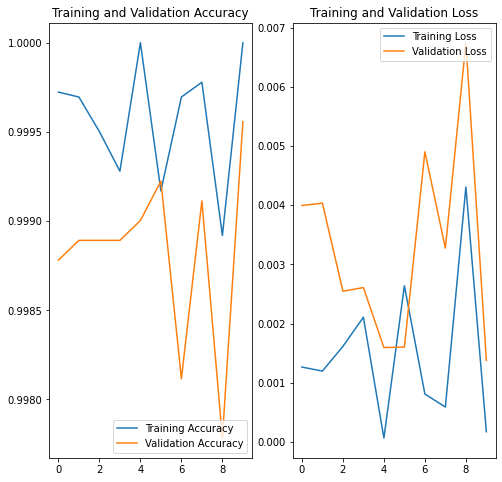

In [74]:
# Visualizing the model loss at each epoch and plotting on graph using matplotlib.
# Using tensorboard is a alternative of the below code.
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
# Making the variable named KERAS_MODE_NAME and storing the model file name in it along with .h5 file extenstion
KERAS_MODE_NAME="Softmax_retrained_updated_for_gradio_1.h5"

In [61]:
# Saving the trained model 
model.save(KERAS_MODE_NAME)

In [63]:
# Importing saved deep learning model from drive to make inference
from tensorflow import keras
from keras.models import load_model
model = keras.models.load_model('/content/Softmax_retrained_updated_for_gradio_1.h5')

In [66]:
# Below line of code is used to import the files in computer in colab
from google.colab import files
# To change the dimension of imported image, keras.preprocessing is used
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size = (192,192))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  # Predicting the import image is belong in which class
  classes = model.predict(images, batch_size = 10) # the complies model is used
  score = tf.nn.softmax(classes[0])
  # Printing out the predicted class name and it's accuracy
  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )



In [67]:
# Wrote a function to check the size of model file
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [68]:
# Below function is used to convert the size of KB to MB or Vise versa
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [1]:
# Calling the above functions
convert_bytes(get_file_size(KERAS_MODE_NAME),"MB")

File size: 108.109 kilobytes


In [70]:
# Gradio is a Web Application which provide frontend to make inference with downloaded model
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.0 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 140 kB 90.8 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 272 kB 88.8 MB/s 
     |████████████████████████████████| 1.1 MB 76.9 MB/s 
     |████████████████████████████████| 212 kB 91.6 MB/s 
     |████████████████████████████████| 2.3 MB 65.6 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 85.5 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 95.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 

In [71]:
# Importing the gragio in colab
import gradio as gr

In [72]:
# Predict image is a fucntion which takes image of any size and shape, convert it into 192,192 image and make the prediction by using downloaded model
def predict_image(img):
  img_4d=img.reshape(-1,192,192,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [73]:
# Callig predict_image function 
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://30640.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 122ms/step
Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fe3d8920310>,
 'http://127.0.0.1:7860/',
 'https://30640.gradio.app')